In [1]:
import pandas as pd 
import matplotlib.pyplot as plot

from wordcloud import WordCloud, STOPWORDS

data = pd.read_csv("output.csv")
pd.set_option('display.max_rows', None)

In [2]:
count = len(data)
print count
data.head(10)

6540


,title,author,created
0,[ENG-633] Add registration metrics gathering s...,brianjgeiger,2019-06-20T19:31:35Z
1,[ENG-438] Fix preprint metrics,brianjgeiger,2019-06-19T18:54:31Z
2,[ENG-422] APIv2 Browsable API-only 500 Error,corbinSanders,2019-06-18T17:12:56Z
3,[ENG-349] Feature/fix pending embargoed regist...,UdayVarkhedkar,2019-06-17T15:43:43Z
4,Reset Password page breaks login page[ENG-49],corbinSanders,2019-06-14T17:46:40Z
5,Removing collections from the django admin app...,corbinSanders,2019-06-14T13:55:40Z
6,[ENG-415] Add periodic task that deactivates r...,Johnetordoff,2019-06-13T19:36:50Z
7,[ENG-586] Add ShowIfChronosSubmitter condition...,adlius,2019-06-13T16:36:49Z
8,Feature/Editable Category and Logging[ENG-557],pattisdr,2019-06-13T15:54:08Z
9,[ENG-60] Feature/update password reset,UdayVarkhedkar,2019-06-13T13:35:06Z


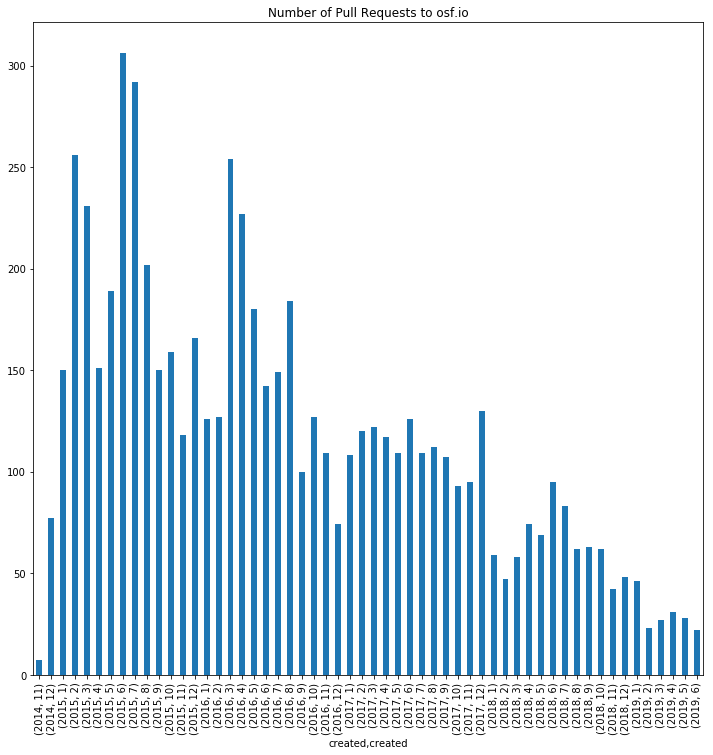

In [3]:
created_hist = data.copy()
created_hist['created'] = created_hist['created'].astype('datetime64')
created_hist['created'].groupby([created_hist['created'].dt.year, created_hist['created'].dt.month]).count().plot(
        kind='bar', 
        title='Number of Pull Requests to osf.io', 
        figsize=(12, 12)
)

In [4]:
stopwords = STOPWORDS

def build_wordcloud(data):
    
    wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=800,
      max_font_size=800, 
      width = 800, height = 800,
      random_state=0
     ).generate(str(data))

    plot.figure(figsize = (12,15), facecolor = None) 
    plot.imshow(wordcloud) 
    plot.axis("off") 
    plot.tight_layout(pad = 0) 

    plot.show() 
    
def return_data_by_author(data, author):
    return data.loc[data['author'] == author]

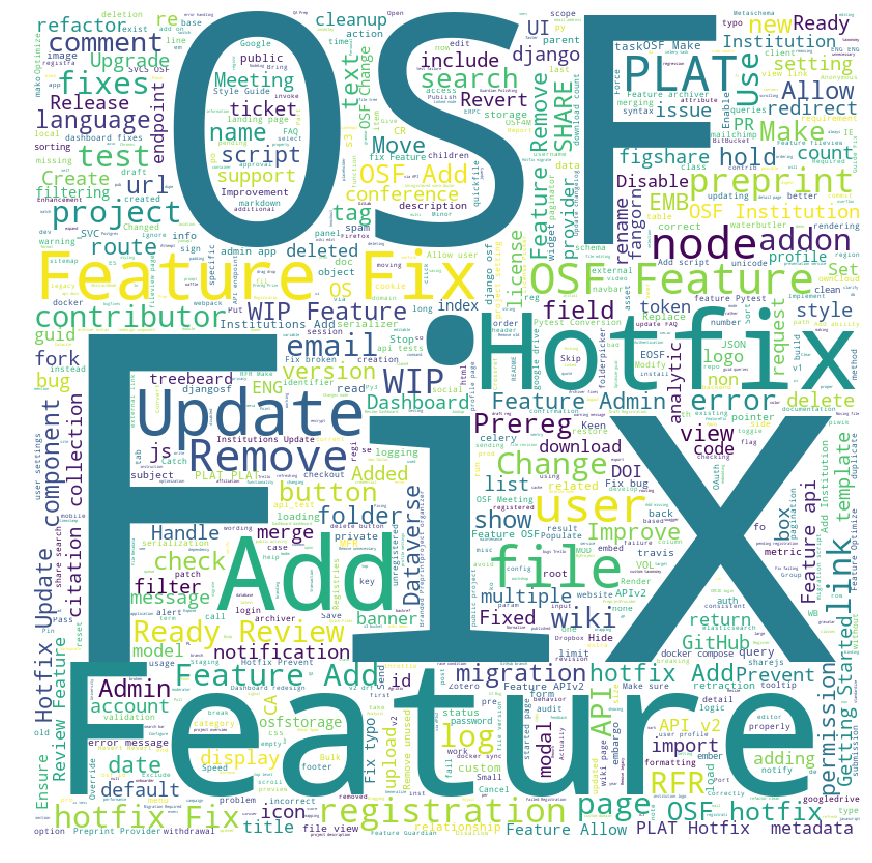

In [5]:
build_wordcloud(data['title'])

In [6]:
stopwords = STOPWORDS
stopwords = stopwords.update(('Fix', 'Feature', 'Plat', 'OSF', 'Add', 'Update', 'Release', 'Change', 'Delete', 'Remove', 'Revert', 'Hotfix', 'ENG', 'EMB', 'WIP', 'Ready', 'Review', 'fixes'))

df = data.set_index(pd.DatetimeIndex(data['created']))

prs_2014 = df[(df.index > '2014-01-01') & (df.index <= '2014-12-31')]
prs_2015 = df[(df.index > '2015-01-01') & (df.index <= '2015-12-31')]
prs_2016 = df[(df.index > '2016-01-01') & (df.index <= '2016-12-31')]
prs_2017 = df[(df.index > '2017-01-01') & (df.index <= '2017-12-31')]
prs_2018 = df[(df.index > '2018-01-01') & (df.index <= '2018-12-31')]
prs_2019 = df[(df.index > '2019-01-01') & (df.index <= '2019-12-31')]

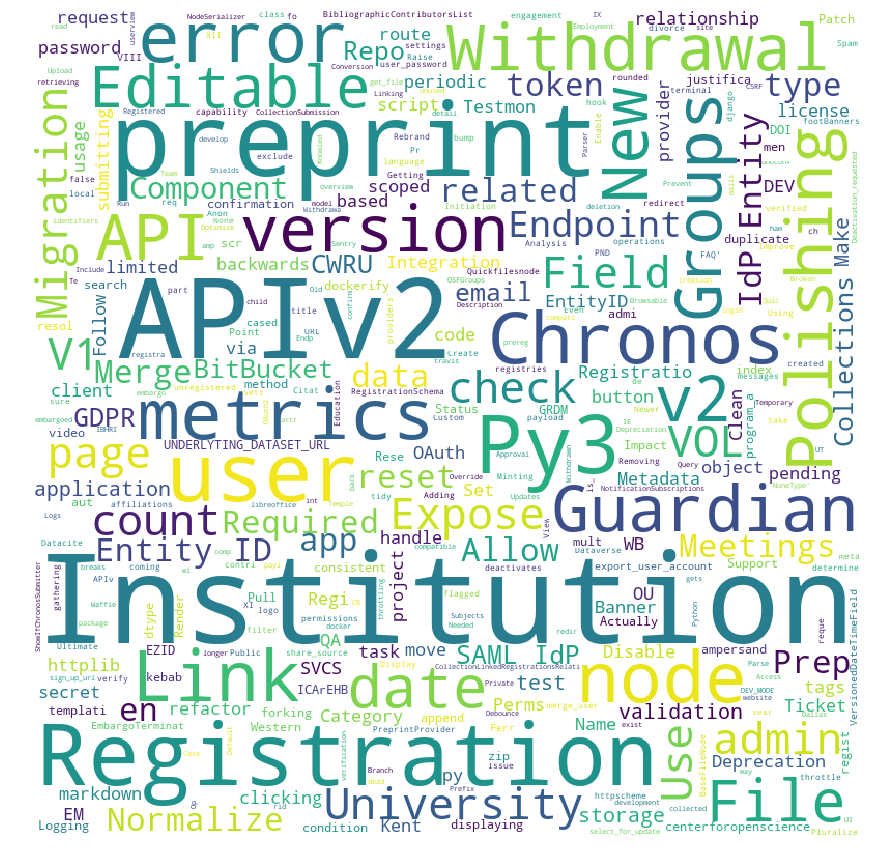

In [7]:
build_wordcloud(prs_2019['title'])

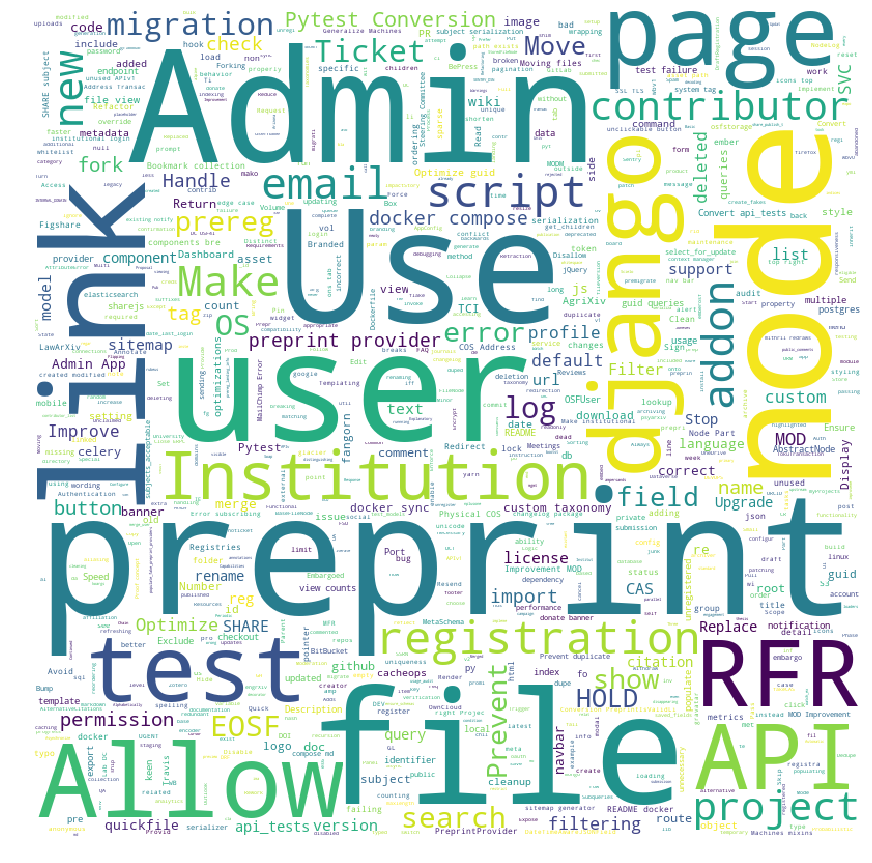

In [8]:
build_wordcloud(prs_2017['title'])

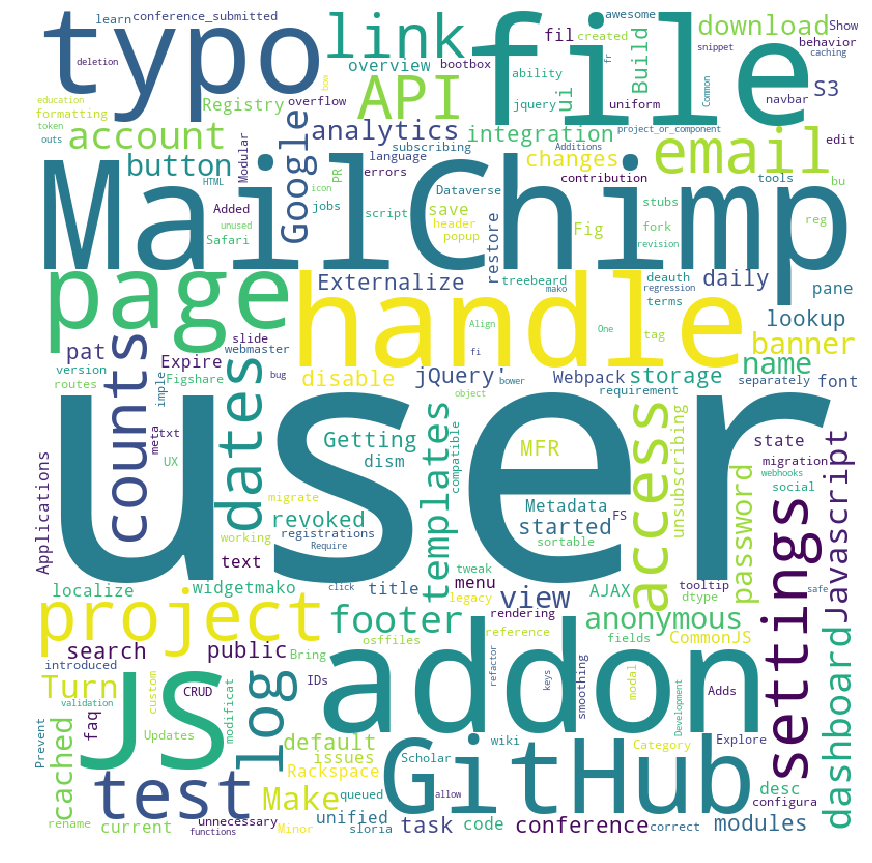

In [9]:
build_wordcloud(prs_2014['title'])

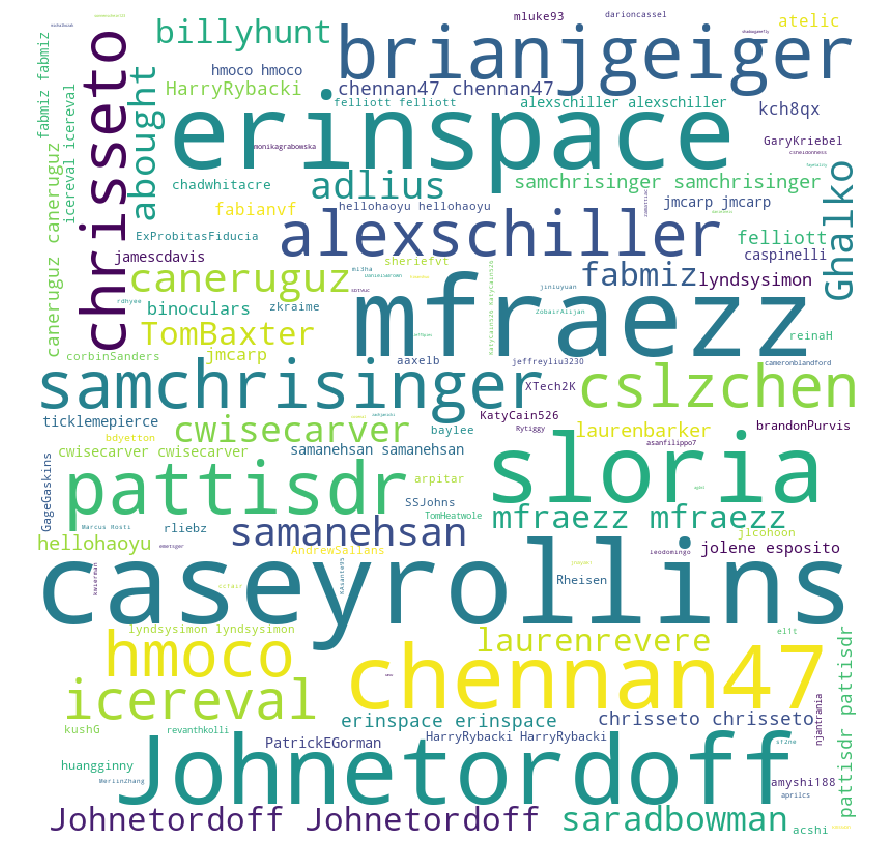

In [10]:
build_wordcloud(data['author'])

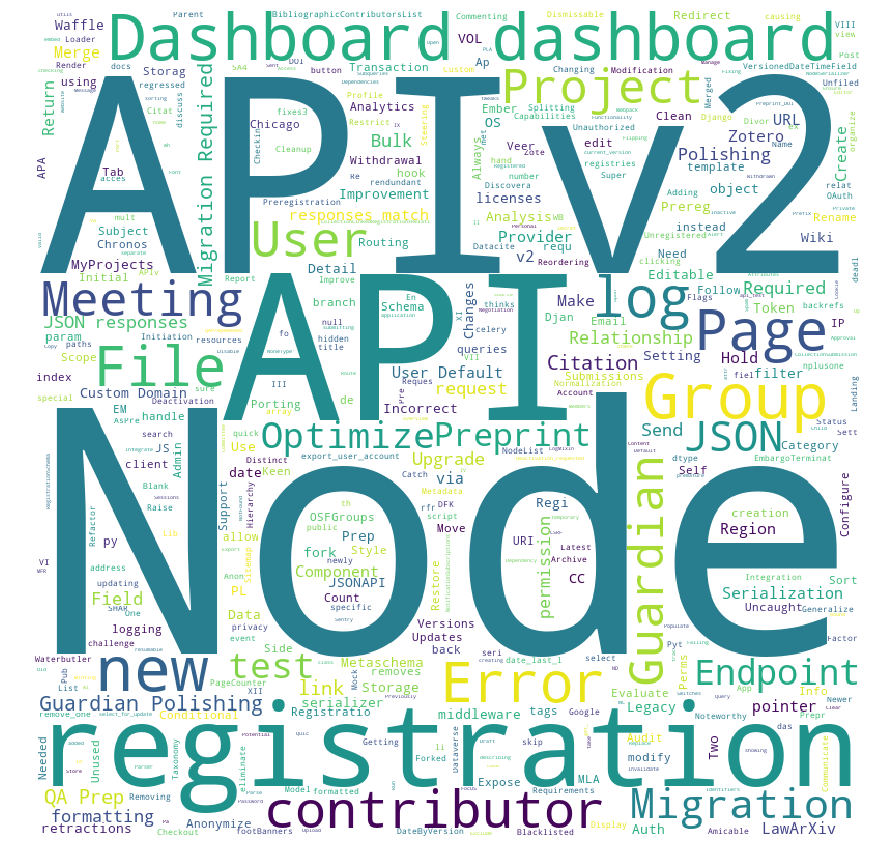

In [11]:
by_author = return_data_by_author(data, 'pattisdr')
build_wordcloud(by_author['title'])